In [1]:
from sklearn import (datasets, manifold, mixture, metrics)
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from manifold_helper import fit_plot, gmm_results, ari_results
import itertools

In [2]:
n_neighbors = 30
n_components = 2
n_class = 4 # classes entre 0 e 10
colors = [list( mcolors.TABLEAU_COLORS )[i] 
          for i in range( n_class )]

In [3]:
digits = datasets.load_digits(n_class=n_class) 
x = digits.data
y = digits.target
n_samples, n_features = x.shape
print(n_samples, n_features)

720 64


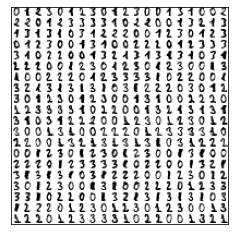

In [4]:
# plot iage of the digits
n_img_per_row = 20
img = np.zeros( (10 * n_img_per_row, 10 * n_img_per_row) )
for i in range( n_img_per_row ):
    ix = 10 * i + 1
    for j in range( n_img_per_row ):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = x[i * n_img_per_row + j].reshape( (8, 8) )
        
plt.imshow( img, cmap=plt.cm.binary )
plt.xticks( [] )
plt.yticks( [] )
plt.show()

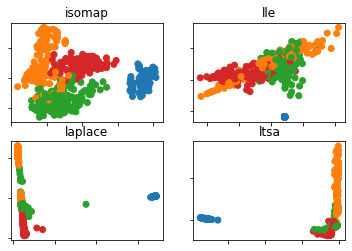

In [5]:
y_colors = [colors[v] for v in y]
y_manifold = fit_plot( x, n_neighbors, n_components, y_colors )

In [6]:
gmm = []
for i in range( 4 ):
    mm = mixture.GaussianMixture( n_components=n_class, covariance_type='full' )
    gmm.append( mm.fit( y_manifold[i] ) )

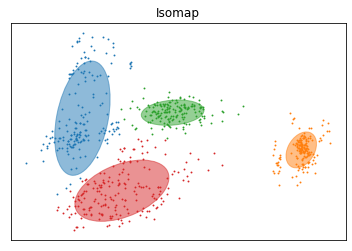

In [7]:
gmm_results( y_manifold[0], gmm[0].predict( y_manifold[0] ), gmm[0].means_, gmm[0].covariances_, 'Isomap', colors )

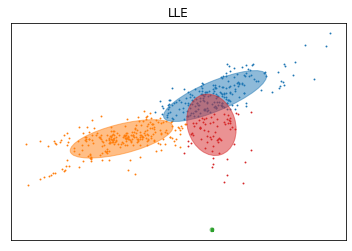

In [8]:
gmm_results( y_manifold[1], gmm[1].predict( y_manifold[1] ), gmm[1].means_, gmm[1].covariances_, 'LLE', colors )

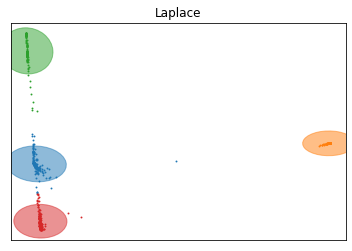

In [9]:
gmm_results( y_manifold[2], gmm[2].predict( y_manifold[2] ), gmm[2].means_, gmm[2].covariances_, 'Laplace', colors )

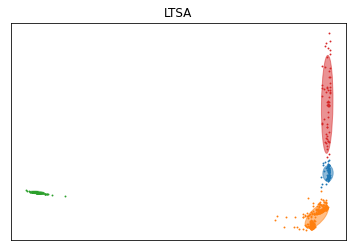

In [10]:
gmm_results( y_manifold[3], gmm[3].predict( y_manifold[3] ), gmm[3].means_, gmm[3].covariances_, 'LTSA', colors )

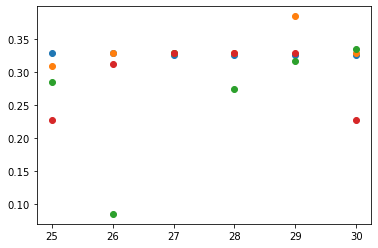

In [15]:
ari_results( x, n_class, 1, range( 25, 31 ), y )